In [1]:
# importing library that i needed
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import yfinance as yf
from datetime import datetime, timedelta ,timezone
from statsmodels.tsa.arima.model import ARIMA
from time import time

# Getting cryptoes and Time period

In [2]:
# 100 coins that have higher market cap 
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'STETH-USD']
# yahoo finance just support 1d and longer times so we do not have 4h and 1h period of time
# timeframes = ['1d', '4h', '1h']
timeframes = ['1d']

# Date range , i get it abit longer than 1 year
start_date = '2022-11-01'
end_date = '2023-11-01'

# Concnat cryptoes' Close

In [3]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        tickerData = yf.Ticker(i)
        data = pd.concat([data, pd.DataFrame(tickerData.history(i, start=start_date, end=end_date)[['Close']])], axis = 1)
#         data2 = pd.concat([data, pd.DataFrame(tickerData.history(i, start=start_date, end=end_date).iloc[:,4])], axis = 1)
#         print(data2)
#         print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        names.append(i)
        print(i)
    data.columns = names
    return data

historical_data = get_historical_Data(cryptos[:30])
print(historical_data.shape)
# Recent Data
historical_data.tail()


BTC-USD
ETH-USD
SOL-USD
STETH-USD
(365, 4)


,BTC-USD,ETH-USD,SOL-USD,STETH-USD
Date,,,,
2023-10-27 00:00:00+00:00,33909.800781,1780.045288,31.739698,1772.941895
2023-10-28 00:00:00+00:00,34089.574219,1776.618164,31.653318,1774.293457
2023-10-29 00:00:00+00:00,34538.480469,1795.546021,32.822609,1792.406616
2023-10-30 00:00:00+00:00,34502.363281,1810.088623,34.962337,1806.022827
2023-10-31 00:00:00+00:00,34667.781250,1816.458984,38.519516,1806.419434


# Random Buy and Hold strategy( 1 Nov 2022 - 1 Nov 2023 )

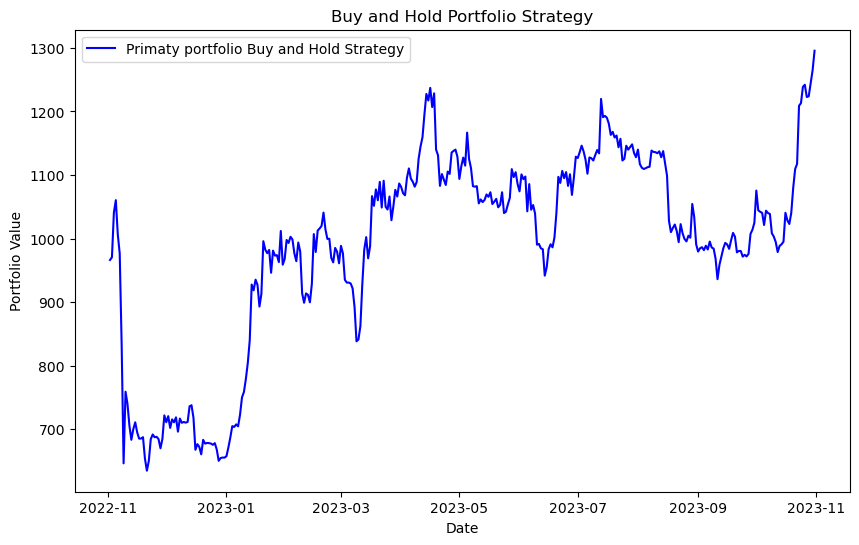

                            BTC-USD   ETH-USD   SOL-USD  STETH-USD
Date                                                              
2022-11-02 00:00:00+00:00  0.984097  0.962023  0.954716   0.963947
2022-11-03 00:00:00+00:00  0.986562  0.969511  0.956446   0.969363
2022-11-04 00:00:00+00:00  1.032314  1.041393  1.047519   1.041799
2022-11-05 00:00:00+00:00  1.038926  1.030552  1.140079   1.031808
2022-11-06 00:00:00+00:00  1.021538  0.995271  1.013494   0.996611
...                             ...       ...       ...        ...
2023-10-27 00:00:00+00:00  1.655326  1.126822  0.984225   1.124029
2023-10-28 00:00:00+00:00  1.664101  1.124652  0.981546   1.124886
2023-10-29 00:00:00+00:00  1.686015  1.136634  1.017805   1.136369
2023-10-30 00:00:00+00:00  1.684252  1.145840  1.084156   1.145002
2023-10-31 00:00:00+00:00  1.692327  1.149873  1.194462   1.145253

[364 rows x 4 columns]
Sharpe Ratio: 0.7828
Sortino Ratio: 1.027691476582054
Net Profit: $295.48


In [4]:
def primary_buyandhold(tickers,initial_investment, weights):
    # Normalize data in historical data
    normalized_prices = tickers / tickers.iloc[0]
    # print(normalized_prices)

    # Calculation of daily return 
    daily_returns = normalized_prices.pct_change().dropna()
    # print(daily_returns)

    # Calculation of cumprod multply member to eachother every time
    cumulative_returns = (1 + daily_returns).cumprod()
    # print(cumulative_returns)

    # Calculation of portfo using cumulative_returns and weights we consider as input
    portfolio_value = initial_investment * (cumulative_returns * weights).sum(axis=1)
    # print(portfolio_value)

    # Calculate daily portfolio returns
    # portfolio_daily_returns = portfolio_value.pct_change().dropna()
    portfo_return = (daily_returns * weights).sum(axis=1)
    # print(portfo_return)
    risk_free = (1.02**(1/365))-1 
    # Calculate Sharpe ratio
    # print(portfolio_daily_returns)
    sharpe_ratio = ((portfo_return.mean() - risk_free) / portfo_return.std())* (365**0.5) 

    # Calculate Sortino ratio
    downside_returns = portfo_return[portfo_return < 0]
    # print(downside_returns.std())
    downside_std_dev = downside_returns.std()
    sortino_ratio = ((portfo_return.mean() - risk_free) / downside_std_dev)* (365**0.5) 

    # Calculate net profit
    net_profit = portfolio_value.iloc[-1] - initial_investment

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns.index, portfolio_value, label='Primaty portfolio Buy and Hold Strategy', color='blue')
    plt.title('Buy and Hold Portfolio Strategy')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

    # Return cumulative_returns and portfo value
    return sharpe_ratio, sortino_ratio, net_profit, cumulative_returns, portfolio_value

# initial money
initial_investment = 1000 
# initial weights
weights = [0.25, 0.25, 0.25, 0.25]  

primary_sharpe, primary_sortino, primary_netprofit, portfolio_cumulative, portfolio_value = primary_buyandhold(historical_data, initial_investment, weights)

df_portfo = pd.DataFrame(portfolio_value)

# df_portfo.iloc[-1]
print(portfolio_cumulative)
print(f"Sharpe Ratio: {primary_sharpe:.4f}")
print(f"Sortino Ratio: {primary_sortino}")
print(f"Net Profit: ${primary_netprofit:.2f}")

# optimize Buy and Hold strategy (1 Nov 2022 - 1 Nov 2023)

In [5]:
# https://www.youtube.com/watch?v=ZmXimqFmXAQ&ab_channel=JohnWu
from scipy.optimize import minimize
# objective function in minimize scipy is for finding min value, so we mul our response to -1 to find it vice versa
def objective(weights,day_return , cum_returns, metric):
    portfolio_return = (cum_returns * weights).sum(axis=1)
    avg_daily_return = (day_return * weights).sum(axis=1)
    # print(avg_daily_return)
    if metric == 'net_profit':
        return -1 * (portfolio_return.iloc[-1] - 1000)
    elif metric == 'sharp_ratio':
        return -1 * ((avg_daily_return.mean() / avg_daily_return.std()) * (365**0.5))  
    elif metric == 'sortino_ratio':
        downside_returns = avg_daily_return[avg_daily_return < 0]
        downside_std_dev = downside_returns.std()
        return -1 * ((avg_daily_return.mean() / downside_std_dev) * (365**0.5)) 

# print(historical_data)
initial_investment = 1000 
# Normalize prices
normalized_prices_for_optimization = historical_data / historical_data.iloc[0]

# daily return
daily_returns_for_optimization = normalized_prices_for_optimization.pct_change().dropna()

# cumlative return
cumulative_returns_for_optimization = (1 + daily_returns_for_optimization).cumprod()
# print(cumulative_returns_for_optimization)

initial_weights = [0.25, 0.25, 0.25, 0.25]

# portfo_return_for_optimization = (daily_returns_for_optimization * weights).sum(axis=1)

# constraint for weights : sum of weights must be equal to 1
cons = ({'type': 'eq', 'fun': lambda weights: sum(weights) - 1})

# weights must be between 0 and 1
bnds = tuple((0, 1) for _ in range(len(historical_data.columns)))

# Optimization  metrics
metrics = ['net_profit', 'sharp_ratio', 'sortino_ratio']
optimal_weights = {}

for metric in metrics:
    result = minimize(objective, initial_weights, args=(daily_returns_for_optimization ,cumulative_returns_for_optimization, metric),
                      bounds=bnds, constraints=cons , method='SLSQP')
    optimal_weights[metric] = result.x

# optimal weights
for metric, weights in optimal_weights.items():
    print(f"Optimal weights for {metric}: {weights}")

# Calculate portfolio returns based on the optimal weights
optimal_portfolio_returns = initial_investment * (cumulative_returns_for_optimization * optimal_weights['net_profit']).sum(axis=1)

# final calculation
risk_free = (1.02**(1/365))-1 
# net profit
optimal_net_profit = optimal_portfolio_returns.iloc[-1] - initial_investment

# sharpe ratio
sharp_ratio_optimization_return = (daily_returns_for_optimization * optimal_weights['sharp_ratio']).sum(axis=1)
optimal_sharp_ratio = ((sharp_ratio_optimization_return.mean() - risk_free )/ sharp_ratio_optimization_return.std()) * (365**0.5)

# sortino ratio
sortino_ratio_optimization_return = (daily_returns_for_optimization * optimal_weights['sortino_ratio']).sum(axis=1)
optimal_downside_returns = sortino_ratio_optimization_return[sortino_ratio_optimization_return < 0]
optimal_downside_std_dev = optimal_downside_returns.std()
optimal_sortino_ratio = ((sortino_ratio_optimization_return.mean() - risk_free) / optimal_downside_std_dev) * (365**0.5)

# Display the calculated metrics for the optimized portfolio
print(f"Optimal Net Profit: ${optimal_net_profit:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharp_ratio:.4f}")
print(f"Optimal Sortino Ratio: {optimal_sortino_ratio:.4f}")


Optimal weights for net_profit: [1.00000000e+00 1.94289029e-16 0.00000000e+00 0.00000000e+00]
Optimal weights for sharp_ratio: [1.00000000e+00 1.11022302e-16 1.38777878e-16 0.00000000e+00]
Optimal weights for sortino_ratio: [1. 0. 0. 0.]
Optimal Net Profit: $692.33
Optimal Sharpe Ratio: 1.3129
Optimal Sortino Ratio: 1.8784


# Getting Second time Period

In [6]:
# 100 coins that have higher market cap 
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'STETH-USD']
# yahoo finance just support 1d and longer times so we do not have 4h and 1h period of time
# timeframes = ['1d', '4h', '1h']
timeframes = ['1d']

# Date range , i get it abit longer than 1 year
start_date = '2023-11-02'
end_date = '2023-12-02'

# Getting cryptoes for second time frame

In [7]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        tickerData = yf.Ticker(i)
        data = pd.concat([data, pd.DataFrame(tickerData.history(i, start=start_date, end=end_date)[['Close']])], axis = 1)
#         data2 = pd.concat([data, pd.DataFrame(tickerData.history(i, start=start_date, end=end_date).iloc[:,4])], axis = 1)
#         print(data2)
#         print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        names.append(i)
        print(i)
    data.columns = names
    return data

historical_data = get_historical_Data(cryptos[:30])
print(historical_data.shape)
# Recent Data
historical_data.tail()


BTC-USD
ETH-USD
SOL-USD
STETH-USD
(30, 4)


,BTC-USD,ETH-USD,SOL-USD,STETH-USD
Date,,,,
2023-11-27 00:00:00+00:00,37254.167969,2027.417358,55.064621,2021.337646
2023-11-28 00:00:00+00:00,37831.085938,2049.338135,58.194370,2044.804077
2023-11-29 00:00:00+00:00,37858.492188,2029.929199,59.250130,2027.640869
2023-11-30 00:00:00+00:00,37712.746094,2052.556152,59.241623,2045.652100
2023-12-01 00:00:00+00:00,38688.750000,2087.139893,59.803997,2080.591797


# Random Buy and Hold strategy (2 Nov 2023 - 2 dec 2023)

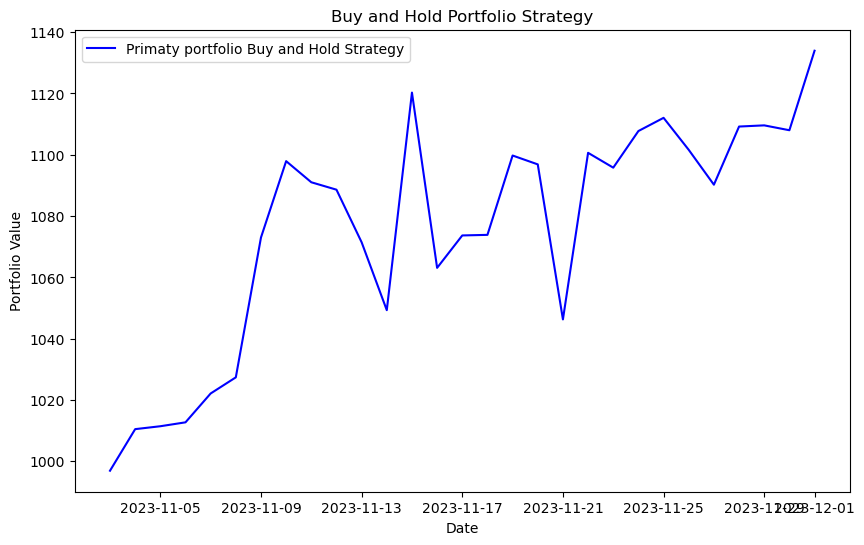

                            BTC-USD   ETH-USD   SOL-USD  STETH-USD
Date                                                              
2023-11-03 00:00:00+00:00  0.994106  1.017868  0.982894   1.014422
2023-11-04 00:00:00+00:00  1.004120  1.031699  1.053200   1.027509
2023-11-05 00:00:00+00:00  1.003180  1.051947  1.025643   1.048536
2023-11-06 00:00:00+00:00  1.002837  1.055101  1.047778   1.051079
2023-11-07 00:00:00+00:00  1.014463  1.048596  1.071752   1.042353
2023-11-08 00:00:00+00:00  1.020523  1.049262  1.074173   1.046809
2023-11-09 00:00:00+00:00  1.050228  1.177683  1.130256   1.170953
2023-11-10 00:00:00+00:00  1.067998  1.154207  1.408786   1.153166
2023-11-11 00:00:00+00:00  1.062963  1.140003  1.395326   1.137866
2023-11-12 00:00:00+00:00  1.060572  1.135823  1.396605   1.134798
2023-11-13 00:00:00+00:00  1.044768  1.141420  1.290977   1.138998
2023-11-14 00:00:00+00:00  1.017156  1.099095  1.413624   1.099861
2023-11-15 00:00:00+00:00  1.084215  1.144277  1.629902   1.13

In [8]:
def primary_buyandhold(tickers,initial_investment, weights):
    # Normalize data in historical data
    normalized_prices = tickers / tickers.iloc[0]
    # print(normalized_prices)

    # Calculation of daily return 
    daily_returns = normalized_prices.pct_change().dropna()
    # print(daily_returns)

    # Calculation of cumprod multply member to eachother every time
    cumulative_returns = (1 + daily_returns).cumprod()
    # print(cumulative_returns)

    # Calculation of portfo using cumulative_returns and weights we consider as input
    portfolio_value = initial_investment * (cumulative_returns * weights).sum(axis=1)
    # print(portfolio_value)

    # Calculate daily portfolio returns
    # portfolio_daily_returns = portfolio_value.pct_change().dropna()
    portfo_return = (daily_returns * weights).sum(axis=1)
    # print(portfo_return)
    risk_free = (1.02**(1/365))-1 
    # Calculate Sharpe ratio
    # print(portfolio_daily_returns)
    sharpe_ratio = ((portfo_return.mean() - risk_free) / portfo_return.std())* (365**0.5) 

    # Calculate Sortino ratio
    downside_returns = portfo_return[portfo_return < 0]
    # print(downside_returns.std())
    downside_std_dev = downside_returns.std()
    sortino_ratio = ((portfo_return.mean() - risk_free) / downside_std_dev)* (365**0.5) 

    # Calculate net profit
    net_profit = portfolio_value.iloc[-1] - initial_investment

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns.index, portfolio_value, label='Primaty portfolio Buy and Hold Strategy', color='blue')
    plt.title('Buy and Hold Portfolio Strategy')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.show()

    # Return cumulative_returns and portfo value
    return sharpe_ratio, sortino_ratio, net_profit, cumulative_returns, portfolio_value

# initial money
initial_investment = 1000 
# initial weights
weights = [0.8, 0.1 , 0.05, 0.05]  

primary_sharpe, primary_sortino, primary_netprofit, portfolio_cumulative, portfolio_value = primary_buyandhold(historical_data, initial_investment, weights)

df_portfo = pd.DataFrame(portfolio_value)

# df_portfo.iloc[-1]
print(portfolio_cumulative)
print(f"Sharpe Ratio: {primary_sharpe:.4f}")
print(f"Sortino Ratio: {primary_sortino}")
print(f"Net Profit: ${primary_netprofit:.2f}")

# Optimize Buy and Hold strategy (2 Nov 2023 - 2 dec 2023)

In [9]:
# https://www.youtube.com/watch?v=ZmXimqFmXAQ&ab_channel=JohnWu
from scipy.optimize import minimize
# objective function in minimize scipy is for finding min value, so we mul our response to -1 to find it vice versa
def objective(weights,day_return , cum_returns, metric):
    portfolio_return = (cum_returns * weights).sum(axis=1)
    avg_daily_return = (day_return * weights).sum(axis=1)
    # print(avg_daily_return)
    if metric == 'net_profit':
        return -1 * (portfolio_return.iloc[-1] - 1000)
    elif metric == 'sharp_ratio':
        return -1 * ((avg_daily_return.mean() / avg_daily_return.std()) * (365**0.5))  
    elif metric == 'sortino_ratio':
        downside_returns = avg_daily_return[avg_daily_return < 0]
        downside_std_dev = downside_returns.std()
        return -1 * ((avg_daily_return.mean() / downside_std_dev) * (365**0.5)) 

# print(historical_data)
initial_investment = 1000 
# Normalize prices
normalized_prices_for_optimization = historical_data / historical_data.iloc[0]

# daily return
daily_returns_for_optimization = normalized_prices_for_optimization.pct_change().dropna()

# cumlative return
cumulative_returns_for_optimization = (1 + daily_returns_for_optimization).cumprod()
# print(cumulative_returns_for_optimization)

initial_weights = [0.25, 0.25, 0.25, 0.25]

# portfo_return_for_optimization = (daily_returns_for_optimization * weights).sum(axis=1)

# constraint for weights : sum of weights must be equal to 1
cons = ({'type': 'eq', 'fun': lambda weights: sum(weights) - 1})

# weights must be between 0 and 1
bnds = tuple((0, 1) for _ in range(len(historical_data.columns)))

# Optimization  metrics
metrics = ['net_profit', 'sharp_ratio', 'sortino_ratio']
optimal_weights = {}

for metric in metrics:
    result = minimize(objective, initial_weights, args=(daily_returns_for_optimization ,cumulative_returns_for_optimization, metric),
                      bounds=bnds, constraints=cons , method='SLSQP')
    optimal_weights[metric] = result.x

# optimal weights
for metric, weights in optimal_weights.items():
    print(f"Optimal weights for {metric}: {weights}")

# Calculate portfolio returns based on the optimal weights
optimal_portfolio_returns = initial_investment * (cumulative_returns_for_optimization * optimal_weights['net_profit']).sum(axis=1)

# final calculation
risk_free = (1.02**(1/365))-1 
# net profit
optimal_net_profit = optimal_portfolio_returns.iloc[-1] - initial_investment

# sharpe ratio
sharp_ratio_optimization_return = (daily_returns_for_optimization * optimal_weights['sharp_ratio']).sum(axis=1)
optimal_sharp_ratio = ((sharp_ratio_optimization_return.mean() - risk_free )/ sharp_ratio_optimization_return.std()) * (365**0.5)

# sortino ratio
sortino_ratio_optimization_return = (daily_returns_for_optimization * optimal_weights['sortino_ratio']).sum(axis=1)
optimal_downside_returns = sortino_ratio_optimization_return[sortino_ratio_optimization_return < 0]
optimal_downside_std_dev = optimal_downside_returns.std()
optimal_sortino_ratio = ((sortino_ratio_optimization_return.mean() - risk_free) / optimal_downside_std_dev) * (365**0.5)

# Display the calculated metrics for the optimized portfolio
print(f"Optimal Net Profit: ${optimal_net_profit:.2f}")
print(f"Optimal Sharpe Ratio: {optimal_sharp_ratio:.4f}")
print(f"Optimal Sortino Ratio: {optimal_sortino_ratio:.4f}")


Optimal weights for net_profit: [5.55111512e-17 8.32667268e-17 1.00000000e+00 2.77555756e-17]
Optimal weights for sharp_ratio: [0.         0.         0.38635572 0.61364428]
Optimal weights for sortino_ratio: [1.42038654e-12 0.00000000e+00 2.02505460e-01 7.97494540e-01]
Optimal Net Profit: $487.38
Optimal Sharpe Ratio: 4.7688
Optimal Sortino Ratio: 7.9758
